# Chapter 7: Stacks

## 7.1 The Stack ADT
* **A *stack* is used to store data such that the last item inserted is the first item removed. It is used to implement a *last-in first-out*(LIFO) type protocol.**
    * **The stack is a linear data structue in which new items are added, or existing items are removed from the same end, commonly referred to as the *top* of tthe stack.**
    * **The opposite end is known as the *base*.**
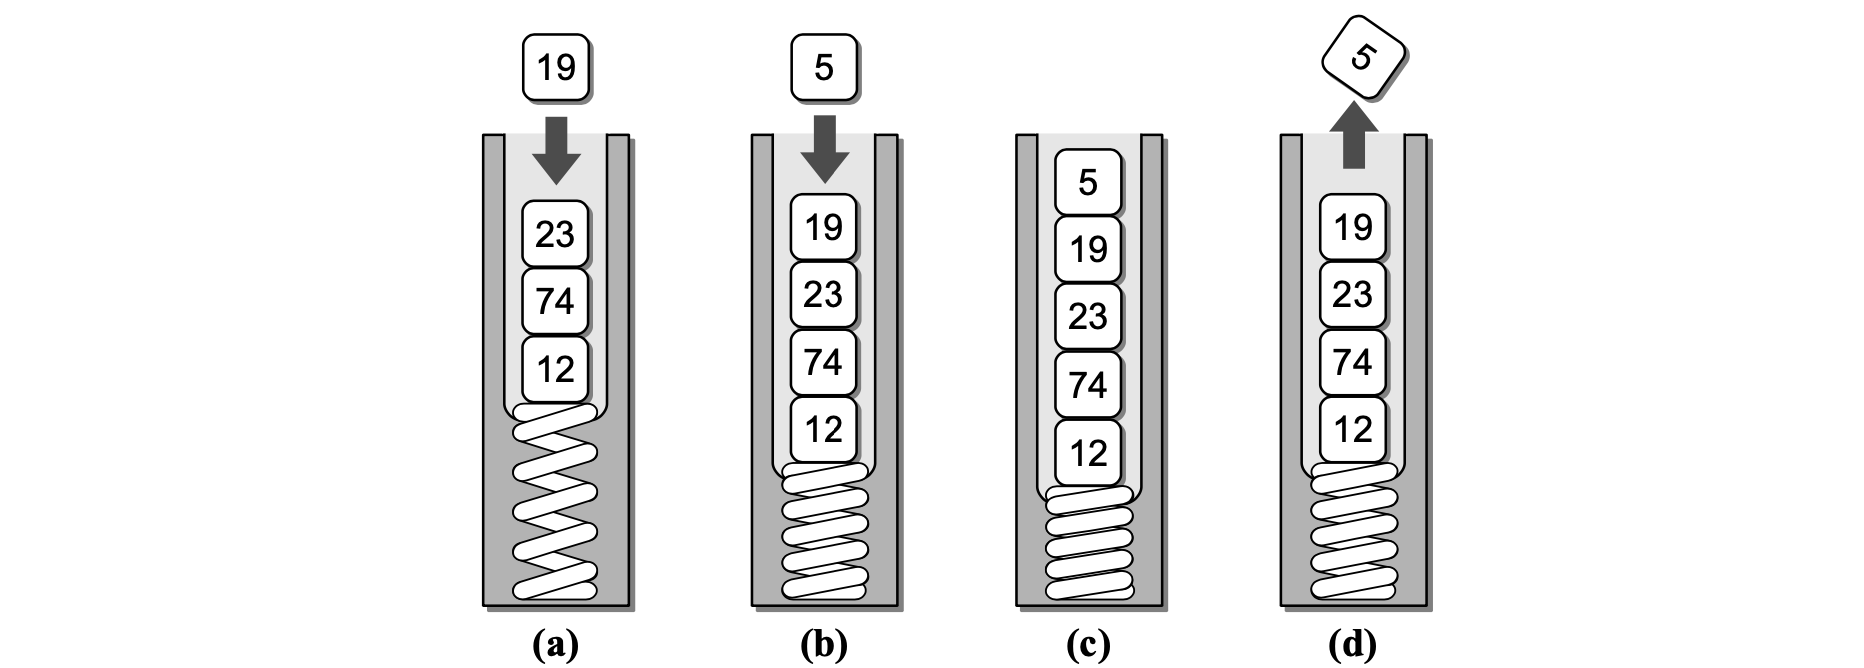

**Stack ADT**<br>
* **A *stack* is a data structure that stores a linear collection of items with access limited to a last-in first-out order. Adding and removing items is restricted to one end known as the *top* of the stack. An *empty* stack is one containing no items.**
    * Stack( ): **Creates a new empty stack.**
    * isEmpty( ): **Returns a boolean value indicating if the stack is empty.**
    * length( ): **Returns the number of items in the stack.**
    * pop( ): **Removes and returns the top item of the stack, if the stack is not empty. Items cannot be popped from an empty stack. The next item on the stack becomes the new top item.**
    * peek( ): **Returns a reference to the item on top of a non-empty stack without removing it. Peeking, which cannot be done on any empty stack, does not modify the stack contents.**
    * push(item): **Adds the give** item **to the top of the stack**

## 7.2 Implementing the Stack
### 7.2.1 Using a Python List
* **We let the end of the list represent the top of the stack and the front represent the base. As the stack grows, items are appended to the end of the list and when items are popped, they are removed from the same end.**
* peek( ) **and** pop( ) **operations can only be used with a non-empty stack since you cannot remove or peek at something not there.**
    * **To implement the** pop( ) **method, we call the** pop( ) **method of the list structure, which actually perfoms the sam operation that we are trying to implement.**
    * **The** push( ) **method simply appends the new items to the end of the list since that represents the top of our stack.**
* isEmpty( ),\_\_len\_\_, **and** peek( ) **only requires** O(1) **times. The** pop( ) **and** push( ) **methods both require** O(n) **time in the worst case since the underlying array used to implement the python list may have to be reallocated to accomodate the addition or removal of the top stack item.**

In [1]:
# Implementation of the Stack ADT using a Python list
class Stack:
    # Creates an empty stack
    def __init__(self):
        self._theItems = list()
    
    # Returns True if the stack is emptu or False otherwise
    def isEmpty(self):
        return len(self) == 0
    
    # Returns the number of items in the stack
    def __len__(self):
        return len(self._theItems)
    
    # Returns the top item on the stack without removing it 
    def peek(self):
        assert not self.isEmpty(), "Cannot peek at an empty stack"
        return self._theItems[-1]
    
    # Removes and returns the top itme on the stack
    def pop(self):
        assert not self.isEmpty(), "Cannot pop from an empty stack"
        return self._theItems.pop()
    
    # Push an item onto the top of the stack
    def push(self, item):
        sel._theItems.append(item)

### 7.2.2 Using a Linked List
* **A singly linked list can be used to implement the Stack ADT, alleviating the convern over array reallocations.**
* **The constructor creates two instance variables for each** Stack. **The** \_top **field is the head reference for maintaining the linked list while** \_size **is an integer value for keeping track of the number of items on the stack.**
* **The $ \_top $ field is the head reference for maintaing the linked list while $ \_size$ is an integer for keeping track of the number of items on the stack.**
* **The $\_StackNode$ calss is used to create the linked list nodes. The inclusion of the link argument is used to initialize the $_next$ field of the new node.**
* push( ): **The two steps requires to prepend a node to a linked list are combined by passing the head reference $\_top$ as the second argument of the $\_StackNode( )$ constructor and assigning a reference to the new node back to $\_top$.**
* **The $peek( )$ method simply returns a reference to the data item in the first node after verifying the stack is not empty.**
* **The $pop( )$ method always removes the first node in the list.**
* **All of the operations are $O(1)$ in the worst case.**
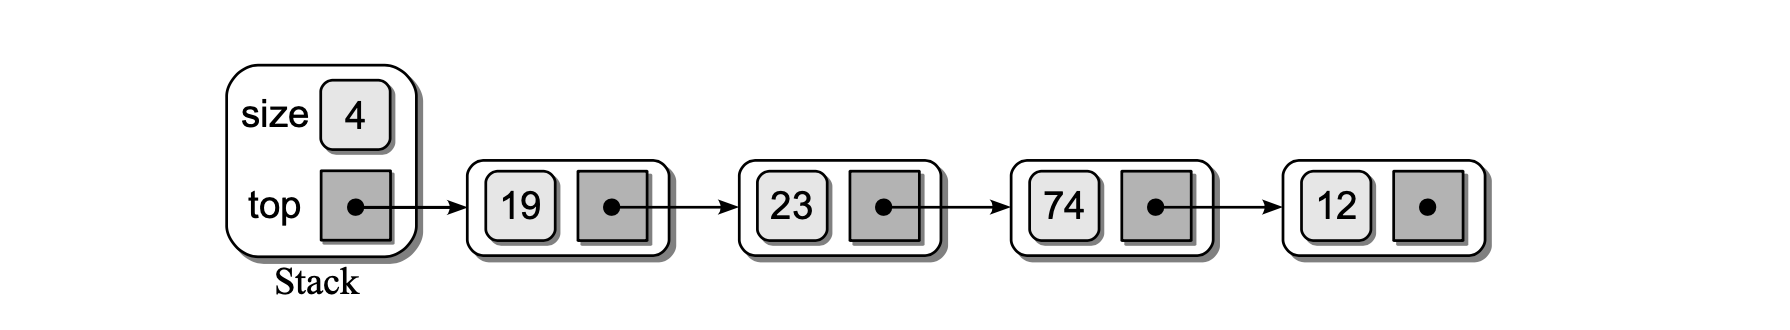

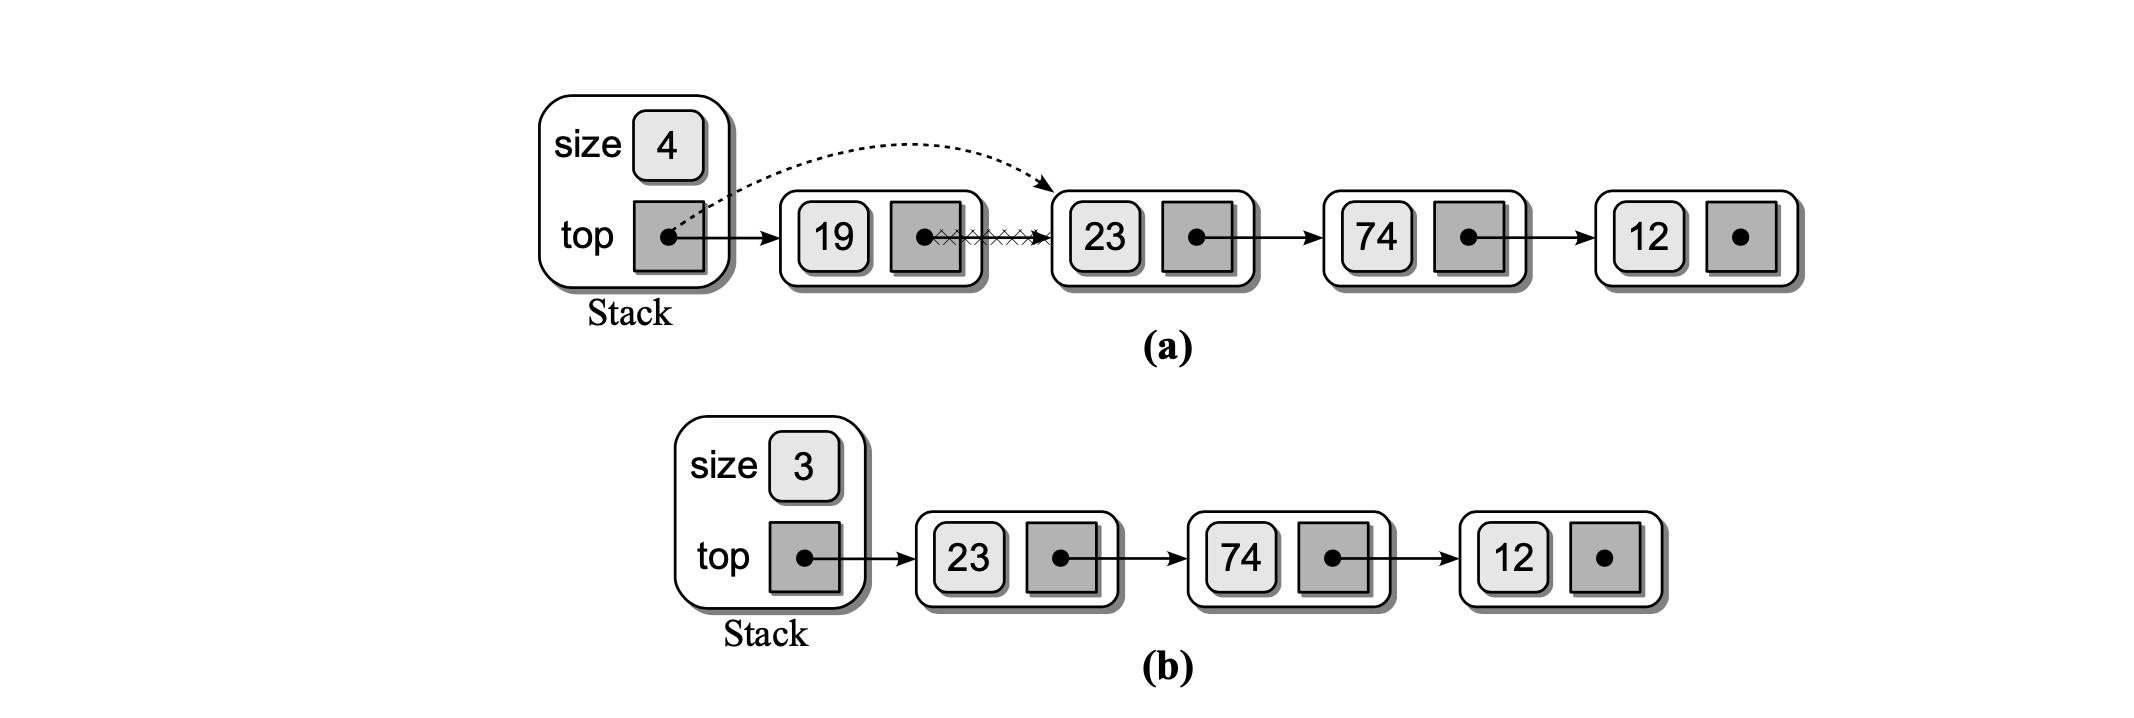

In [4]:
# Implementaion of the Stack ADT using a singly linked list
class Stack:
    # Creates an empty stack
    def __init__(self):
        self._top = None
        self._size = 0
    
    # Returns True if the stack is empty or False otherwise
    def isEmpty(self):
        return self._top is None
    
    # Returns the number of items in the stack
    def __len__(self):
        return self._size
    
    # Returns the top item on the stack without removing it
    def peek(self):
        assert not self.empty(), "Cannot peek at an empty stack"
        return self._top.item
    
    # Removes and returns the top item on the stack
    def pop(self):
        assert not self.isEmpty(), "Cannot pop from an empty stack"
        node = self._top
        self.top = self._top.next
        self._size -= 1
        return node.item
    
    # Pushes an item onto the top of the stack
    def push(self, item):
        self._top = _StackNode(item, self._top)
        sekf._size += 1
        
# The private storage class for creating stack nodes
class _StackNode:
    def __init__(self, item, link):
        self.item = item
        self.next = link

## 7.3 Stack Applications

### 7.3.1 Balanced Delimiters
* **The delimiters must be used in pairs of corresponding types.**
* **They must also be positioned such that an opening delimiter within an outer pair must be closed within the same outer pair.**
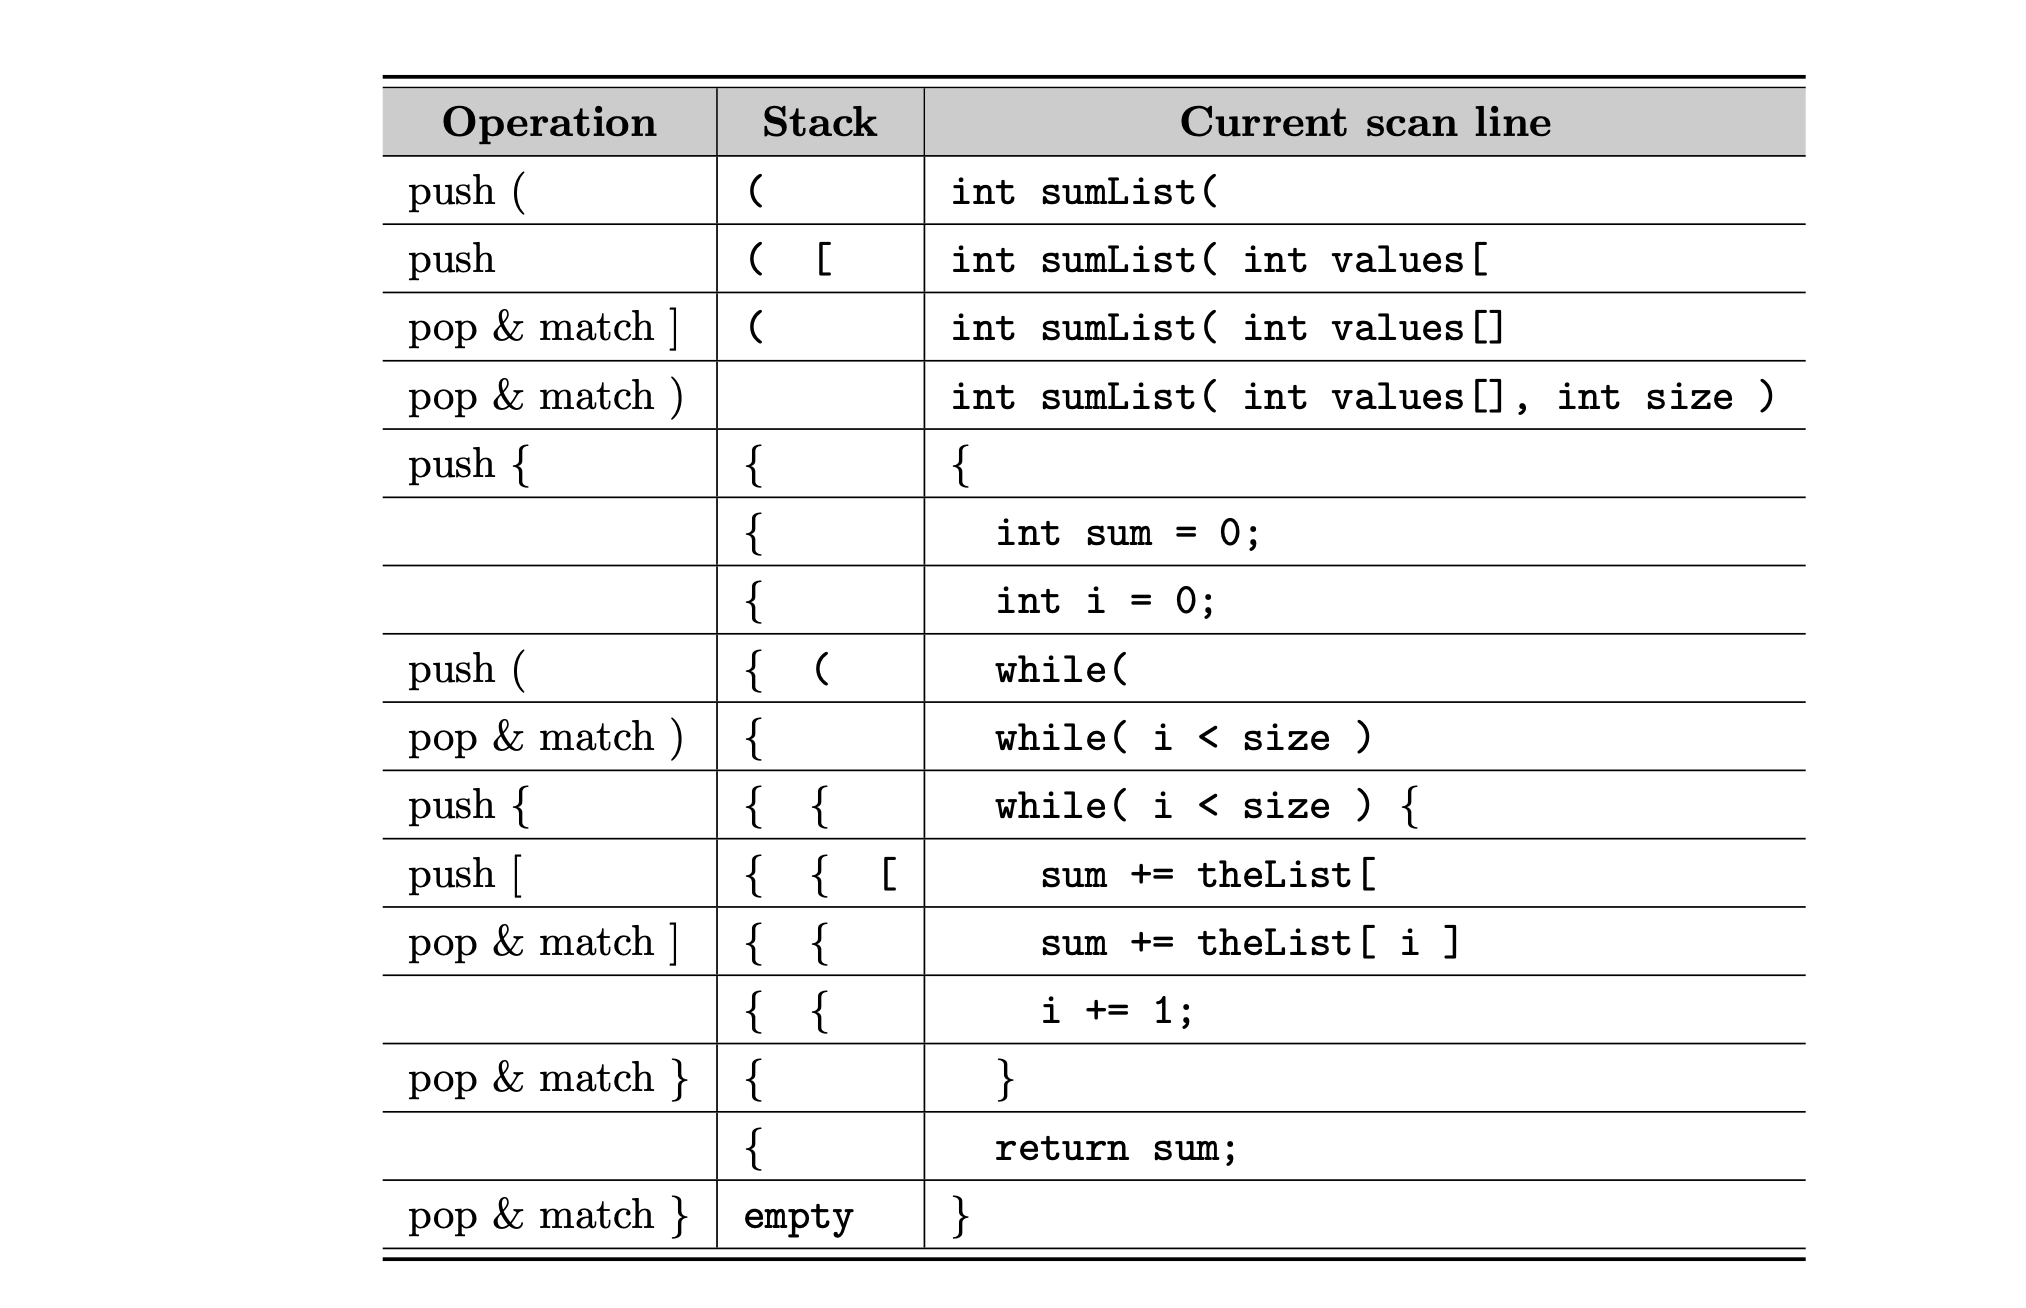
* **The algorithm will need to remember not only the most recent opening delimiter but also all of the preceding ones in order to match them with closing delimiters. In addition,t he opening delimiters will need to be remembered in reverse order with the most recent one availiable.**
    * **Unbalanced delimiters in whcih there are more closing delimiters than openining delimiters can be detected when trying to pop from the stack and we detect the stack is empty.**
    * **Delimiters can also be out of balance in the reverse case where there are more opening delimiters than closing ones. We would end up with the stack not being empty since there are opening delimiters yet to be paired with closing ones.**

In [5]:
def isValidSource(srcfile):
    s = Stack()
    for line in srcfile:
        for token in line:
            if token in "{[(":
                s.push(token)
            elif token in "}])":
                if s.isEmpty():
                    return False
            else:
                left = s.pop()
                if (token == "}" and left != "{") or \
                (token == "]" and left != "[") or \
                (toekn == ")" and left != "("):
                    return False
    return s.isEmpty()

### 7.3.2 Evaluating Postfix Expressions
* ***infix*: different notations may seem to be nothing more than different operator placement.**

#### Converting from Infix to Postfix
* **The expression $A + B - C$ would be written $AB+C-$ in postfix form.**
    * **infix: the common is the traditional algebraic or *infix* notation where the operator is specified operator is specided betweeen the operands $A + B $.**
    * **prefix: places the operator immediately preceding two operands +AB**
    * **postfix: the operator follows the two operands $AB+$.**

**Converting short expressions to postfix form**<br>
1. **Place parenthese around every group of operators in the correct order of evaluation. There should be one set of parentheses for every operator in the infix operation.**
$$ ((A * B) + (C / D)) $$
1. **For each set of parenthese, move the operator from the middle to the end preceding the corresponding closing parenthesis.**
$$ ((AB *)(C D /) +) $$
1. **Remove all of the parentheses, resulting in the equivalent postfix expression.**
$$ A B * C D / + $$

#### Postfix Evaluation Algorithm
1. **If the current item is an operand, push its value onto the stack**
1. **If the current item is an operator:**
    * **Pop the top two operands off the stack.**
    * **Perform the opeartion.(Note the top value is the right operand while the bext to the top value is the left operand)**
    * **Push the result of this operation back onto the stack.**
1. **The final result of the epxression will be the last value on the stack.**
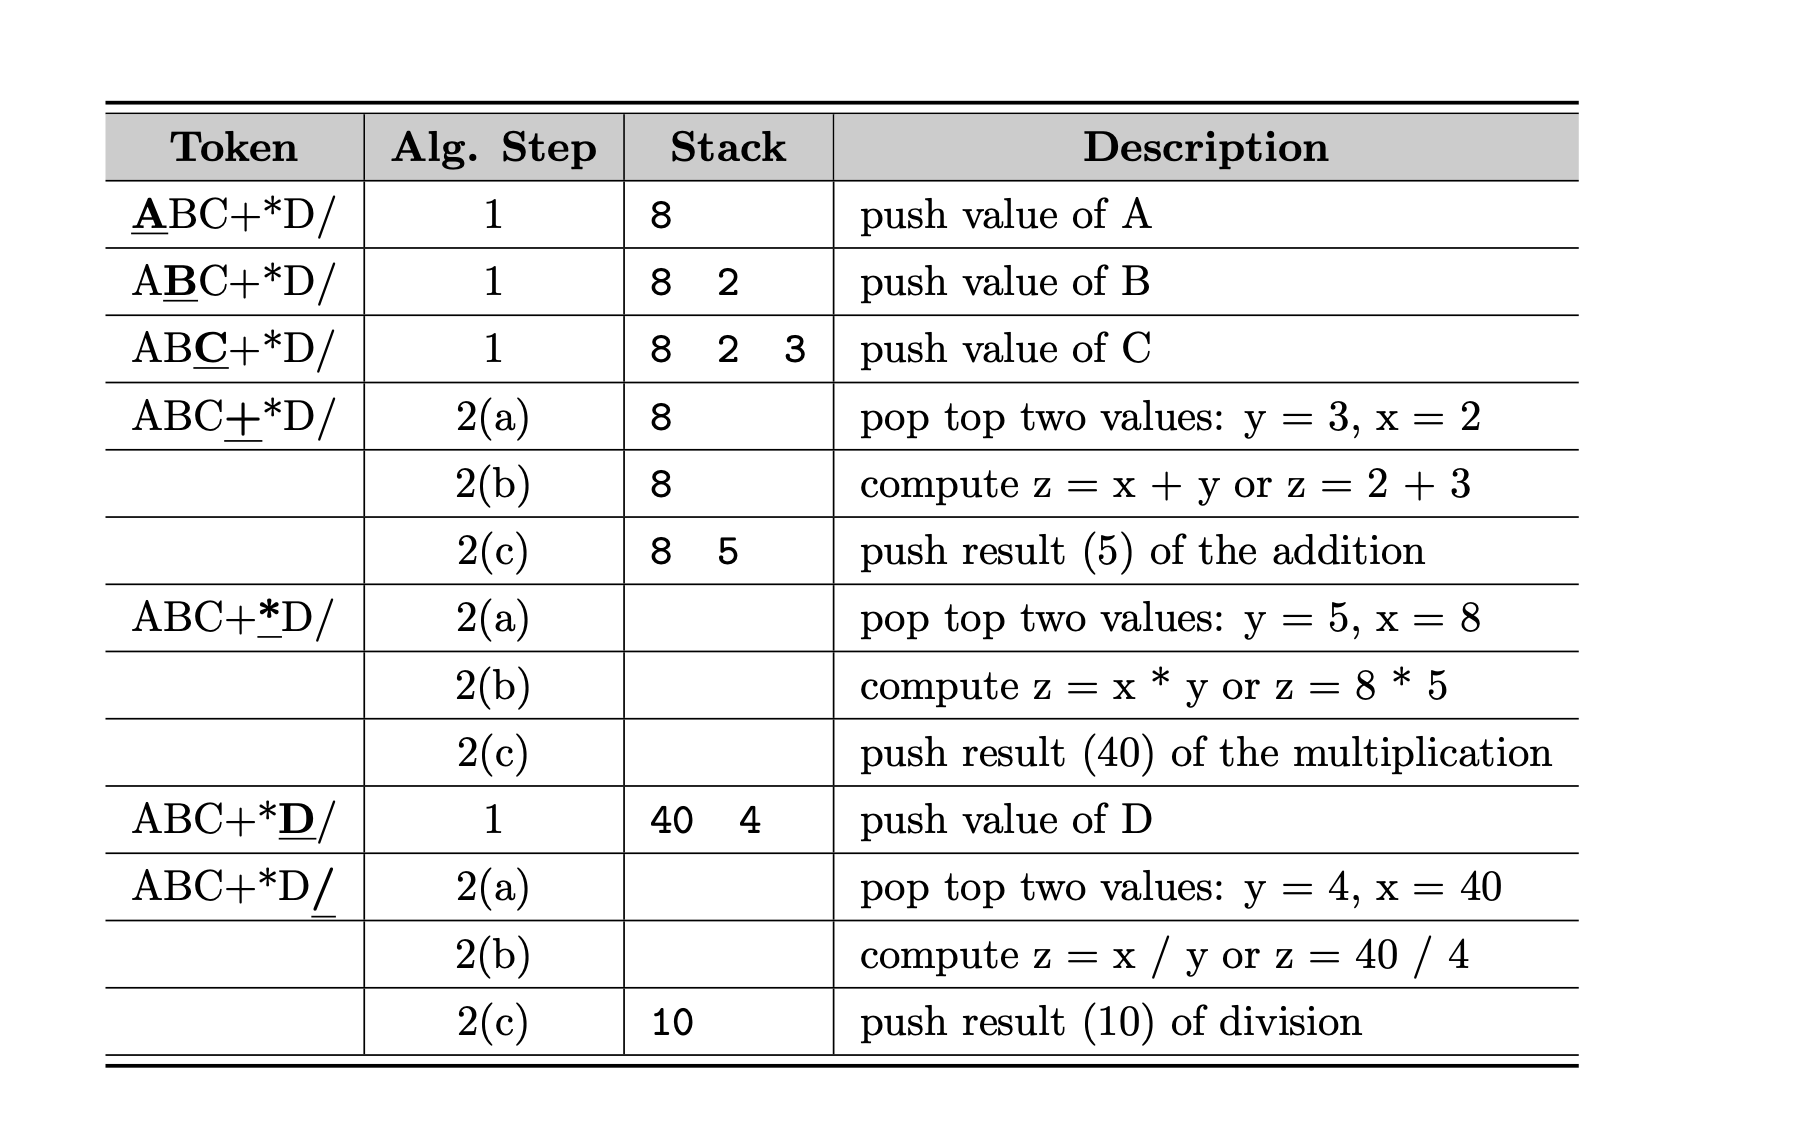
**Error Handling**<br>
* **We must verify the stack is not empty before popping an item. If the stack is empty, we can stop the evaluation and flag an error.**
* **We can pop the result from the stack and then verify the stack is empty. If the stack is not empty, the expression was invalid and we must flag an error.**

## 7.4 Application: Solving a Maze
### 7.4.1 Backtracking
* **Brute-force method: involves searching for a solution to a given problem by systematically trying all possible candidates until either a solution is found or it can be determined there is no solution.**
* **backtracking algorithms: attempt to find a solution to a problem by extending a partial solution one step at a time. If a "dead end" is encountered during the process, the algorithm backtracks one or more steps in an attempt to try other possibilities wigout having to start over from the beginning.**

### 7.4.2 Designing a Solution

#### Problem Details
* **give a maze with indicated starting and exit positions, the objectives are $(1)$ determine if there is a path from the starting position to the exit. $(2)$ specify the path with no circles or loopbacks.**<br>
**Restrictions**<br>
* **Move one cell at a time adn only to open positions, those not blocked by a wall or peviously used along the current path.**
* **Limit movement between open cells to the horizontal and vertical directions-up, down, left, and right.**

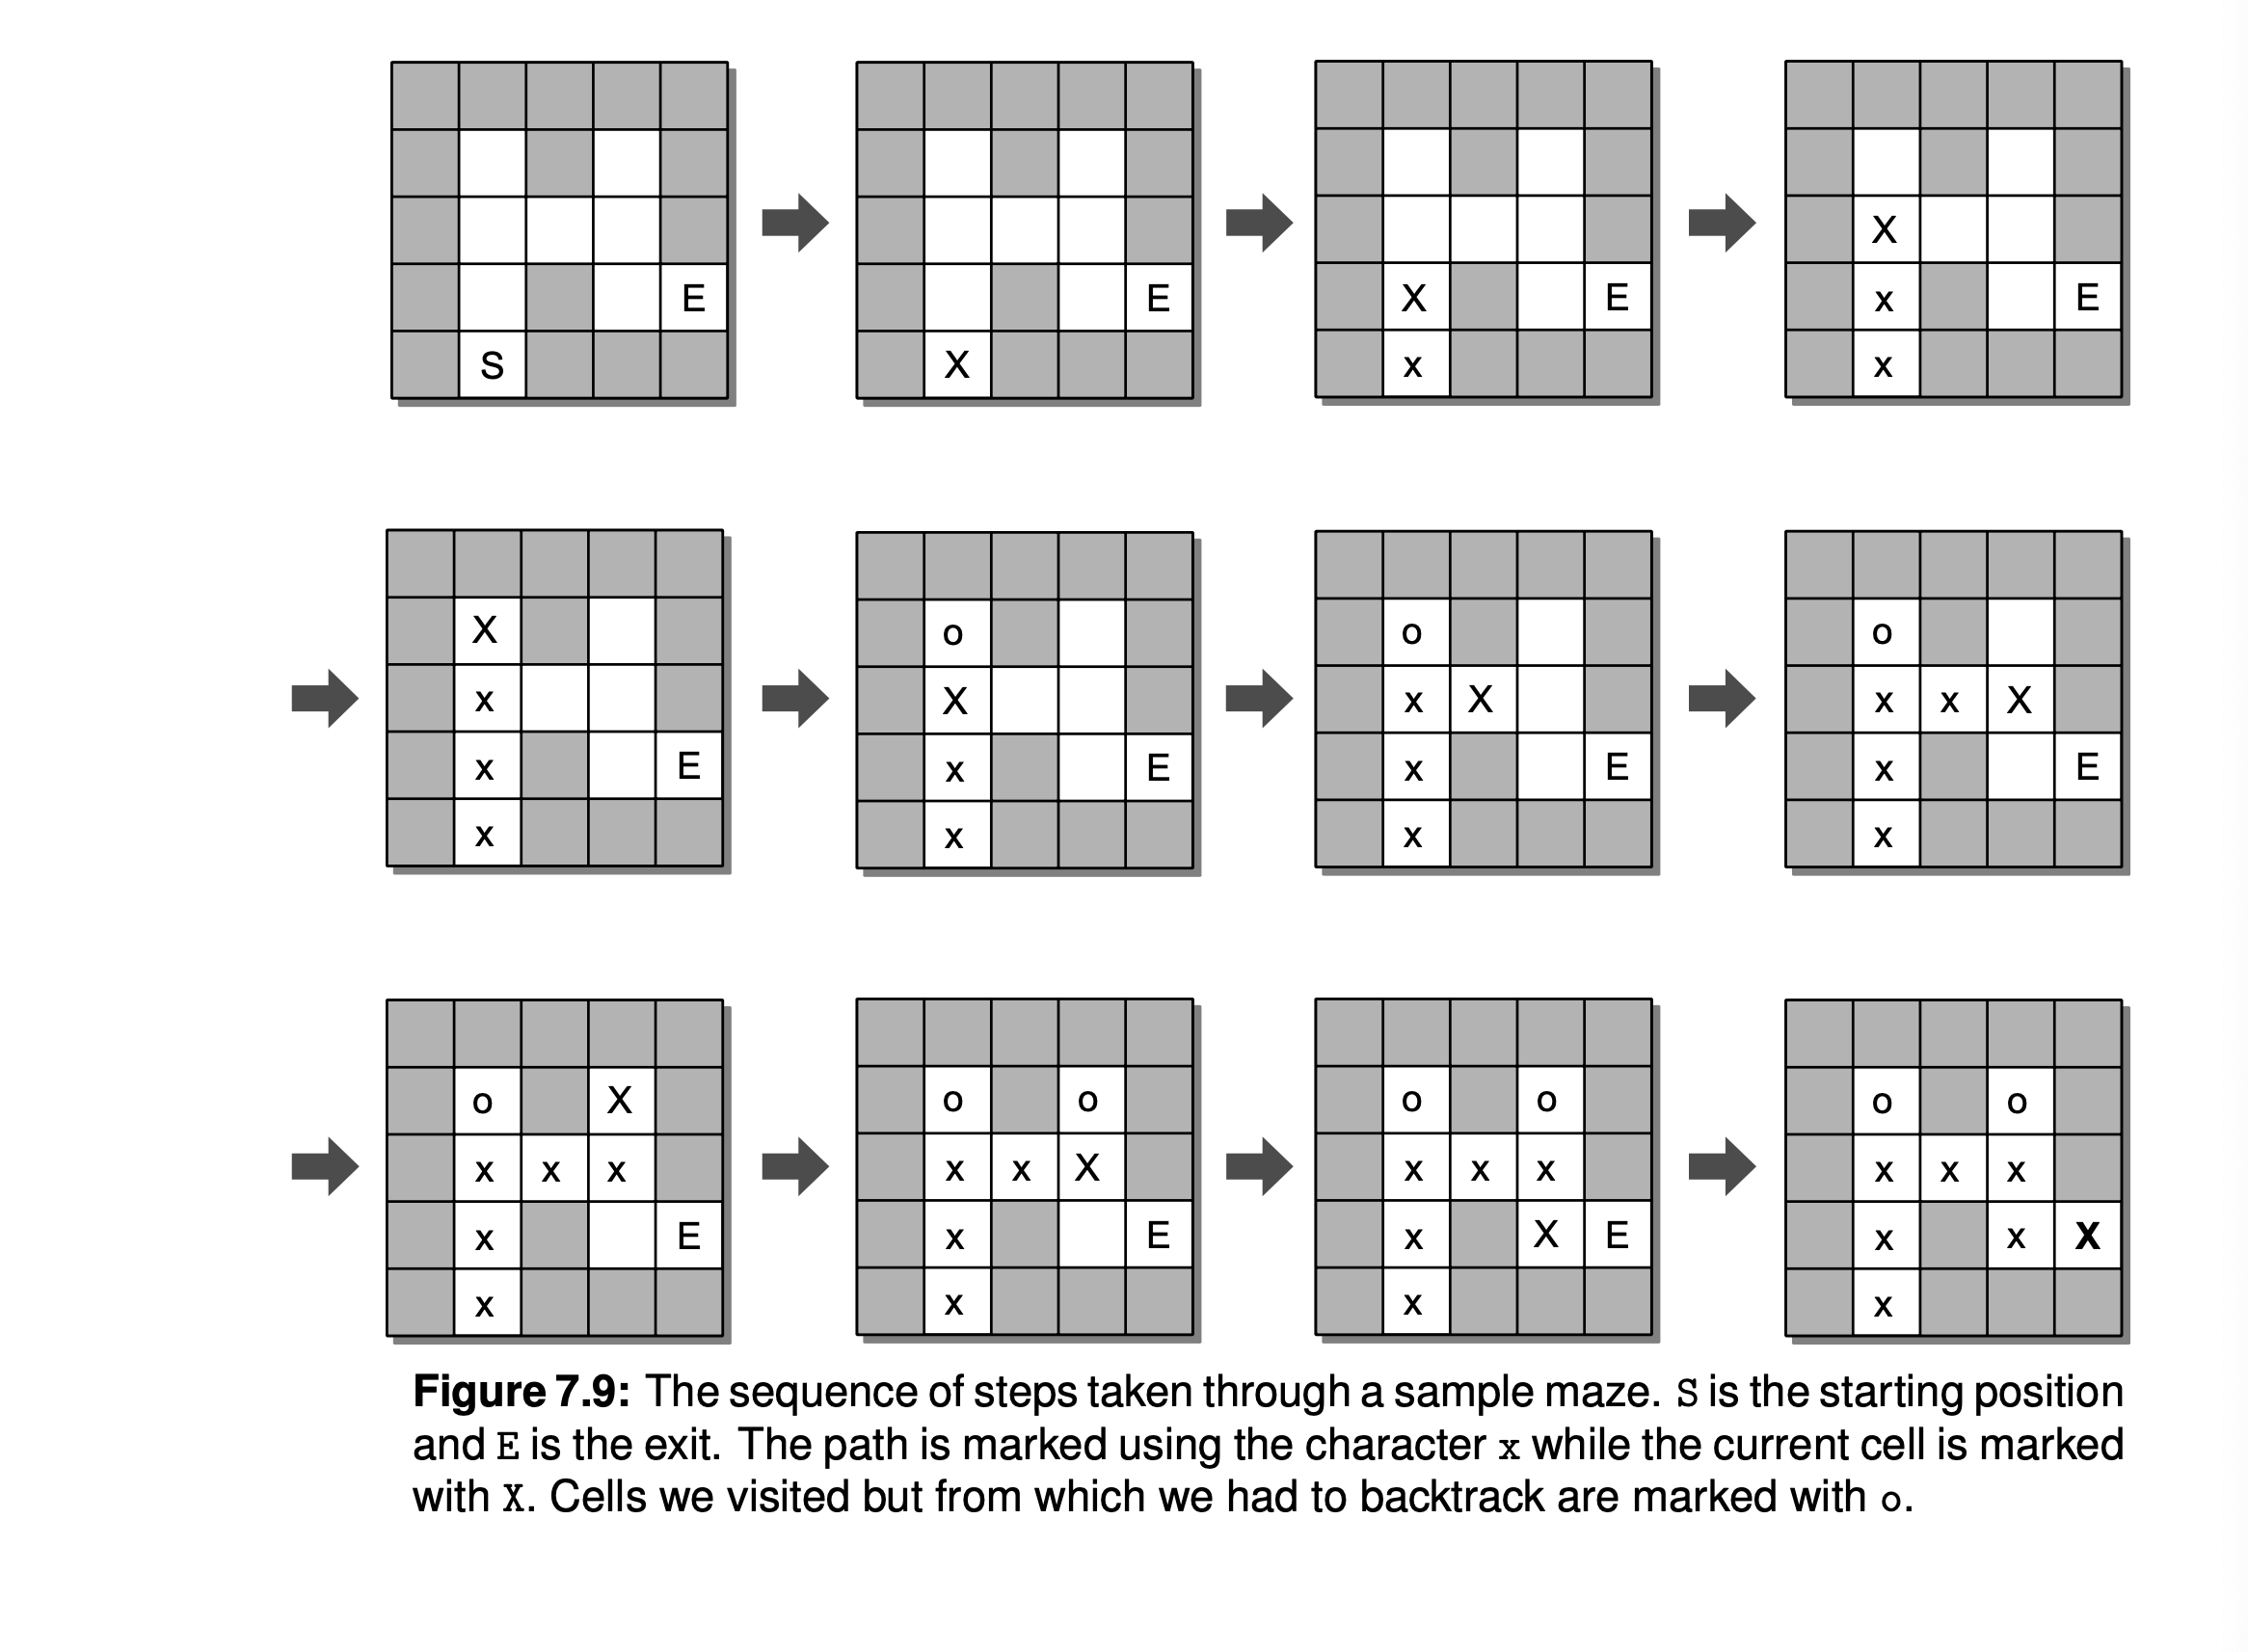

### 7.4.3 The Maze ADT
**Maze ADT**<br>
* **A *maze* is a two-dimensional structure divided into rows and columns of equal-sized cells. The individual cells can eb filled representing. a wall or empty representing an open space. One cell is markes as the starting position and another as the exit.**
* Maze(numRows, numCols): **Creates a new maze with all of the cells initialized as open cells. The starting and exit positions are undefined.**
* numRows( ): **returns the number of rows in the maze.**
* numCols( ): **Returns the number of columns in the maze.**
* setWall(row, col): **Fills the indicated cell(** row, col **)with a wall. The cell indices must be within the vlaid range of rows and columns.**
* setStart(row, col): **Sets the indicated cell(** row, col **) as the starting position. The cell indices must be within the valid range.**
* setExit( row, col): **sets the indicated cell (** row, col **) as the exit position. The cell indices must be within the valid range.**
* findPath( ): **Attempts to solve the maze by finding a path from the starting position to the exit. If a solution is found, the path is marekd with tokens (** x **) and** True **is returned. For a maze with no solution,** False **is returned and the maze is left in its original state. The maze must contain both the starting and exit position. Cells on the perimeter of the maze can be open and it can be assumed there is an invisible wall surronding the entire maze.**
* reset( ): **Resets the maze to its original state by removing any tokens placed during the find path operation.**
* draw( ): **Prints the maze in a readable format using characters to represent the walls and path through the maze, if a path has been found. Both the starting and exit positions are also indicated, if previously set.**

### 7.4.4 Implementation
* **The individual elements of the array will represent the cells of the maze. Strings containing a single character can be used to represent the walls and tokens while the open cells are easily represented as null pointers.**
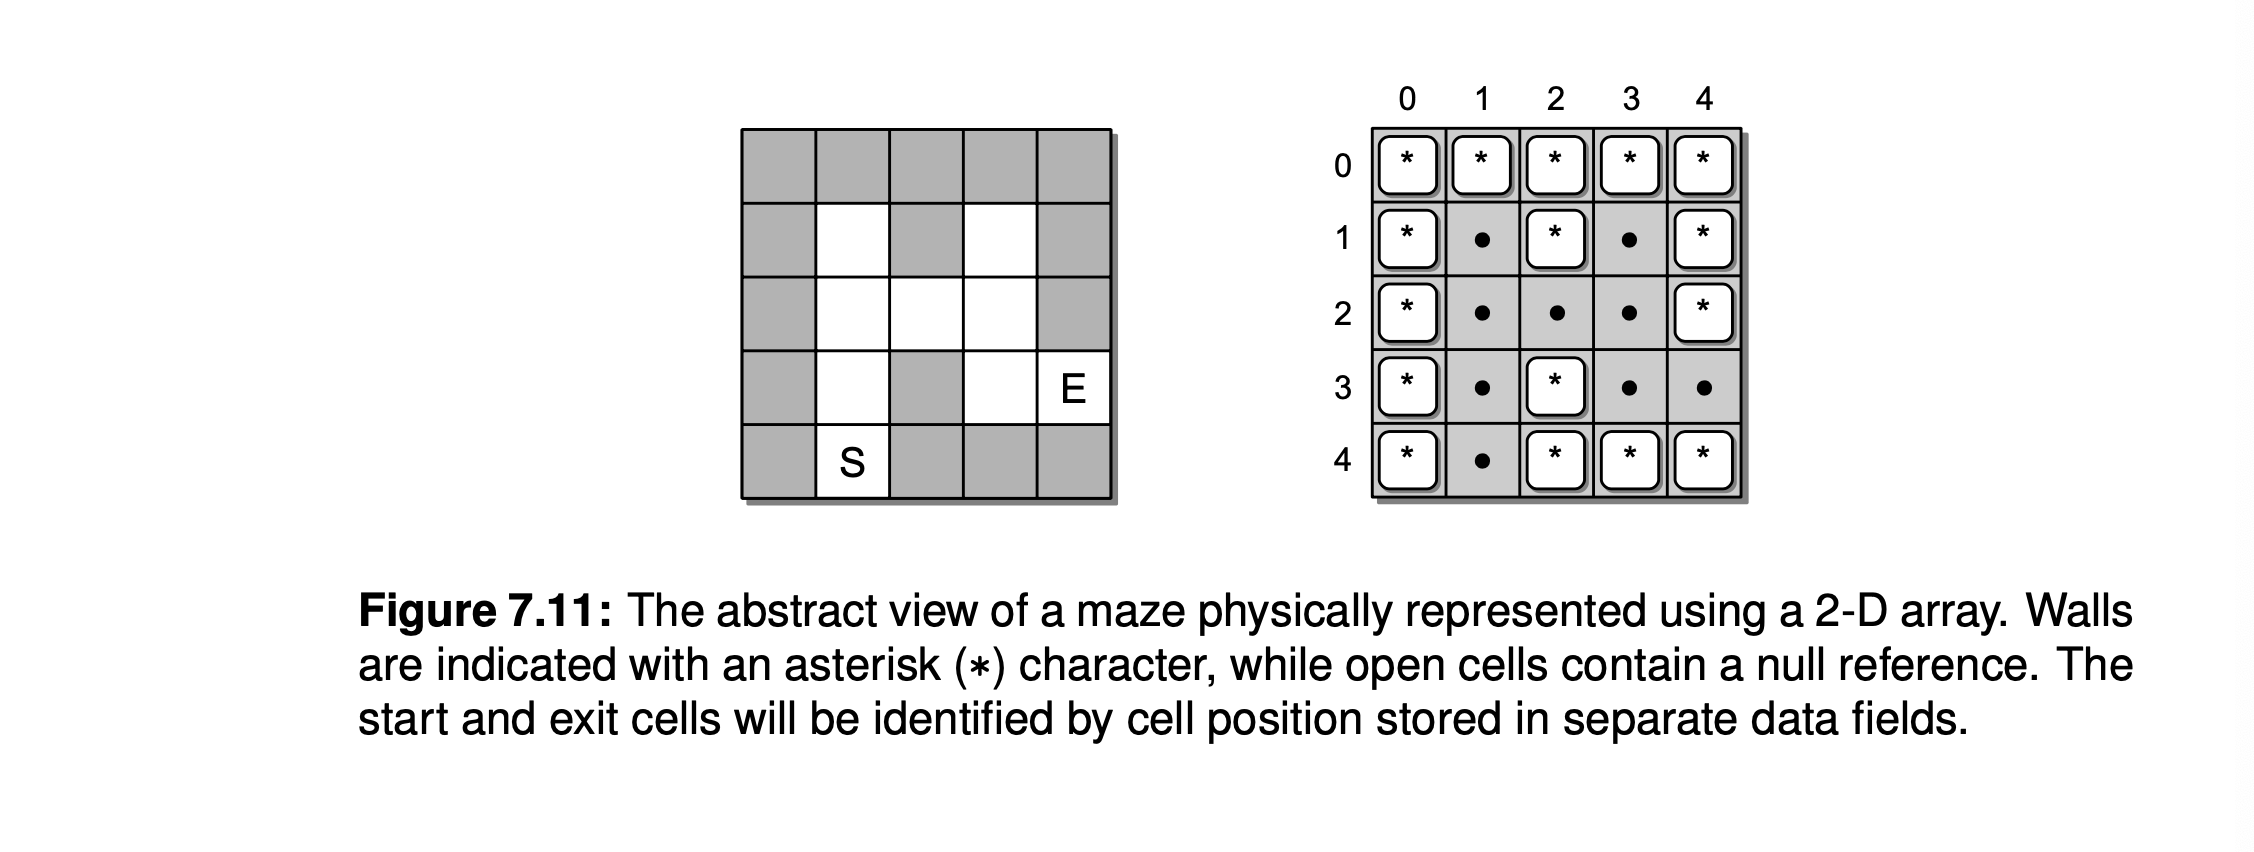

### Class Definition
* **Class variables are not data fields of the individual objects, but are instead variables of the class, which can be access by the individual methods. By using the named constants, the values used to represent the maze wall and tokens could easily be changed if we were so inclined.**
* **The cells of the maze are automatically intialized to $None$, since this is the default value used when creating a $MultiArray$ object. The $\_startCell$ and $\_exitCell$ fields are set to $None $ since they are intially undefined.**

#### Maze Components
* **Components of the maze are specified using the various set methods. Since the user specifies specific maze elements with each of these methods, they must first validate the cell position to ensure the indices are within the valid range.**
    * **The two methods thar set the starting and exit positions simply create and store** \_CellPosition **while the creation of a wall fills the indicated cell using one of the named constants defined earlier.**

#### Helper Methods
* **We will need to drop or place tokens as we move through the maze. The $\_markTried( ) $ and $\_markPath( ) $ methods can be used for this task.**
* **The $\_exitFound( ) $ method is used to determine if the exit is found based on the contents of the $\_exitCell $ object and the current position supplied as arguments.**
* **The $\_validMove( )$ helper method is used to determin if we can move to a given cell. A move is valid if the destination cell is open and its indices are not outside the border of the maze.**



In [11]:
# Implements the Maze ADZT using a 2-D arrat
class Maze:
    # Define constants to represent contents of the maze cells
    MAZE_WALL = "*"
    PATH_TOKEN = "X"
    TRIED_TOKEN = "o"
    
    # Creates a maze object with all cells marked as open
    def __init__(self, numRows, numCols):
        self._mazeCells = Array2D(numRows, numCols)
        self._startCell = None
        self.exitCell = None
        
    # Returns the number of rows in the maze
    def numRows(self):
        return self._mazeCells.numRows()
    
    # Returns the number of columns in the maze
    def numCols(self):
        return self._mazeCells.numCols()
    
    # Fills the indicaed cell with a "wall" market
    def setWall(self, row, col):
        assert row >= 0 and row < self.numRows() and col >= 0 and col < self.numCols(), "Cell index out of range."
        self._mazeCells.set(row, col, self.MAZE_WALL)
    
    # Sets the starting cell position
    def setStart(self, row, col):
        assert row >= 0 and row < self.numRows() and col >= 0 and col < self.numCols(), "Cell index out of range."
        self._startCell = _CellPosition(row, col)
        
    # Sets the exit cell position
    def setExit(self, row, col):
        assert row >= 0 and row < self.numRows() and col >= 0 and col < self.numCols(), "Cell index out of range."
        self._exitCell = _CellPosition(row, col)
        
    # Attempts to solve the maze by finding a path from the starting cell
    # to the exit. Returns True if a path is found and False otherwise
    def findPath(self):
        pass
    
    # Resets the maze by removing all "path" and "tried" tokens
    def reset(self):
        pass
    
    # Prints a text-based representation of the maze
    def draw(self):
        pass
    
    # Returns True if the given cell position is a valid move
    def _validMove(self, row, col):
        return row >= 0 and row < self.numRows() and col >= 0 and col < self.numCols() and self._mazeCells[row, col] is None
    
    # Helper method to determine if the exit was found
    def _exitFound(self, row, col):
        return row == self._exitCell.row and col == self._exitCell.col
    
    # Drops a "tried" token at a given cell
    def _markTried(self, row, col):
        self._mazeCells.set(row, col, self.TRIED_TOKEN)
        
    # Drops a "path" token at the given cell
    def _markPath(self, row, col):
        self._mazeCells.set(row, col, self.PATH_TOKEN)
        
# Private storage class of holding cell position
class _CellPosition():
    def __init__(self, row, col):
        self.row = row 
        self.col = col